In [64]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [65]:
"""
To-Dos:
i. Apply feature scaling (standardizaed values)
ii. Apply dimentionality reduction 
iii. Test with predicted values in training data (fillna(df.mean()))
iv. Evaluate against other supervised learning algorithms (WIP)
"""  

'\nTo-Dos:\ni. Apply feature scaling (standardizaed values)\nii. Apply dimentionality reduction \niii. Test with predicted values in training data (fillna(df.mean()))\niv. Evaluate against other supervised learning algorithms (WIP)\n'

In [66]:
# Load the data from the CSV file
data = pd.read_csv('D:\Learnings\datasets\dataset.csv')

In [67]:
# lets drop the rows with empty cells, later we will instead use predicted values
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)
#data.fillna(data.mean())

In [68]:
# Load the data and prepare the features and labels
#X = data.drop(['Target'], axis=1)
X = data[['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
          'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
          'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
          'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day']]
y = data['Target']

In [69]:
# these columns have strings, encode them
string_columns = data.select_dtypes(include=['object']).columns.tolist()
# Print the names of the string columns
print(string_columns)

['Color', 'Source', 'Month']


In [70]:
#clean the data here
le = LabelEncoder()
#string_columns = ['Source', 'Month', 'Color']
X.loc[:,string_columns] = X[string_columns].apply(lambda col: le.fit_transform(col))

C:\Users\gites\AppData\Local\Temp\ipykernel_12644\275804703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,string_columns] = X[string_columns].apply(lambda col: le.fit_transform(col))


Imputing missing values (instead of dropping we fill them with mean)

In [71]:
#X.fillna(X.mean())
#X.dropna(inplace=True)

In [72]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

Feature Scaling by Standardizing the values

In [73]:
stdsc = StandardScaler()

In [74]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

Decision Trees:

In [75]:
# Train the decision tree on the training data
tree_model = tree.DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree_model.fit(X_train_std, y_train)

# Make predictions on the test data
y_pred = tree_model.predict(X_test_std)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy with Decision trees:', accuracy)

Accuracy with Decision trees: 0.8365161484755638


In [76]:
#list(X.columns)

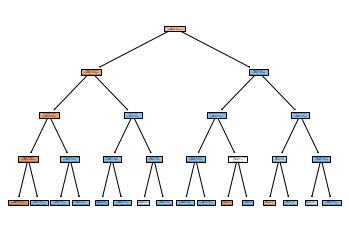

In [77]:
decision_tree_fig = tree.plot_tree(tree_model,feature_names= list(X.columns),filled = True)

Random Forest:

In [78]:
# Train the random forest classifier on the training data
forest = RandomForestClassifier(n_estimators=25,random_state=1,n_jobs=2)
forest.fit(X_train_std,y_train)

# Make predictions on the test data
rfc_y_pred = forest.predict(X_test_std)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, rfc_y_pred)
print('Accuracy with random forest:', accuracy)

Accuracy with random forest: 0.8864734542166859


KNN:

In [60]:
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train_std, y_train)

knn_y_pred = knn.predict(X_test_std)

accuracy = accuracy_score(y_test,knn_y_pred)
print('Accuracy with KNN:',accuracy)

Accuracy with KNN: 0.8097054096137425


In [62]:
"""
document: 
1. Using DecisionTreeClassifier,
    i. Training on 80% data, test on 20%, removed rows with empty cells
        accuracy: 83.15%
          
         
    ii. We will try and test with these decision-tree parameters:
        criterion='gini',max_depth=4,random_state=1
        accuracy: 83.58%
        after standardization: 83.58%
        fillna(df.mean()) instead of dropna:
        
    iii. Training on 95% data, test on 5%, removed rows with empty cells
         accuracy: 83.65%
        
        
2. Using RandomForestClassifier,
    i. Training on 80% data, test on 20%, removed rows with empty cells
        accuracy: 88.50%
        after standardization: 88.50%
        fillna(df.mean()) instead of dropna:
        
    ii. Training on 95% data, test on 5%, removed rows with empty cells
         accuracy: 88.64%
        
3. Using KNN,
    i. Training on 80% data, test on 20%, removed rows with empty cells
        accuracy: 74.33%
        after standardization: 80.97%
        fillna(df.mean()) instead of dropna:
        
    ii. Training on 95% data, test on 5%, removed rows with empty cells
        accuracy:
        
    
         
""" 

"\ndocument: \n1. Using DecisionTreeClassifier,\n    Training on 80% data, test on 20%, removed rows with empty cells\n         accuracy: 83.15%\n          \n         \n    We will try and test with these decision-tree parameters:\n        criterion='gini',max_depth=4,random_state=1\n        accuracy: 83.58%\n        after standardization: 83.58%\n        fillna(df.mean()) instead of dropna:\n        \n        \n2. Using RandomForestClassifier,\n    Training on 80% data, test on 20%, removed rows with empty cells\n        accuracy: 88.50%\n        after standardization: 88.50%\n        fillna(df.mean()) instead of dropna:\n        \n3. Using KNN,\n    Training on 80% data, test on 20%, removed rows with empty cells\n        accuracy: 74.33%\n        after standardization: 80.97%\n        fillna(df.mean()) instead of dropna:\n         \n"